# Lindbladian

In [1]:
import sys
sys.path.insert(0, '../../src_tf/')

import numpy as np
import qiskit as qk
import matplotlib.pyplot as plt
import multiprocessing as mp
import random
import pickle

from qiskit.quantum_info import DensityMatrix, random_unitary
from qiskit.quantum_info import Operator
from scipy.linalg import sqrtm
from tqdm.notebook import tqdm

from loss_functions import *
from optimization import *
from quantum_channel import *
from quantum_tools import *
from experimental import *
from spam import *

#np.set_printoptions(threshold=sys.maxsize)
np.set_printoptions(precision=4)

import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

## Conjecture

In [16]:
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)
n = 4
d = 2**n

lindblad = LindbladMap(d, d)

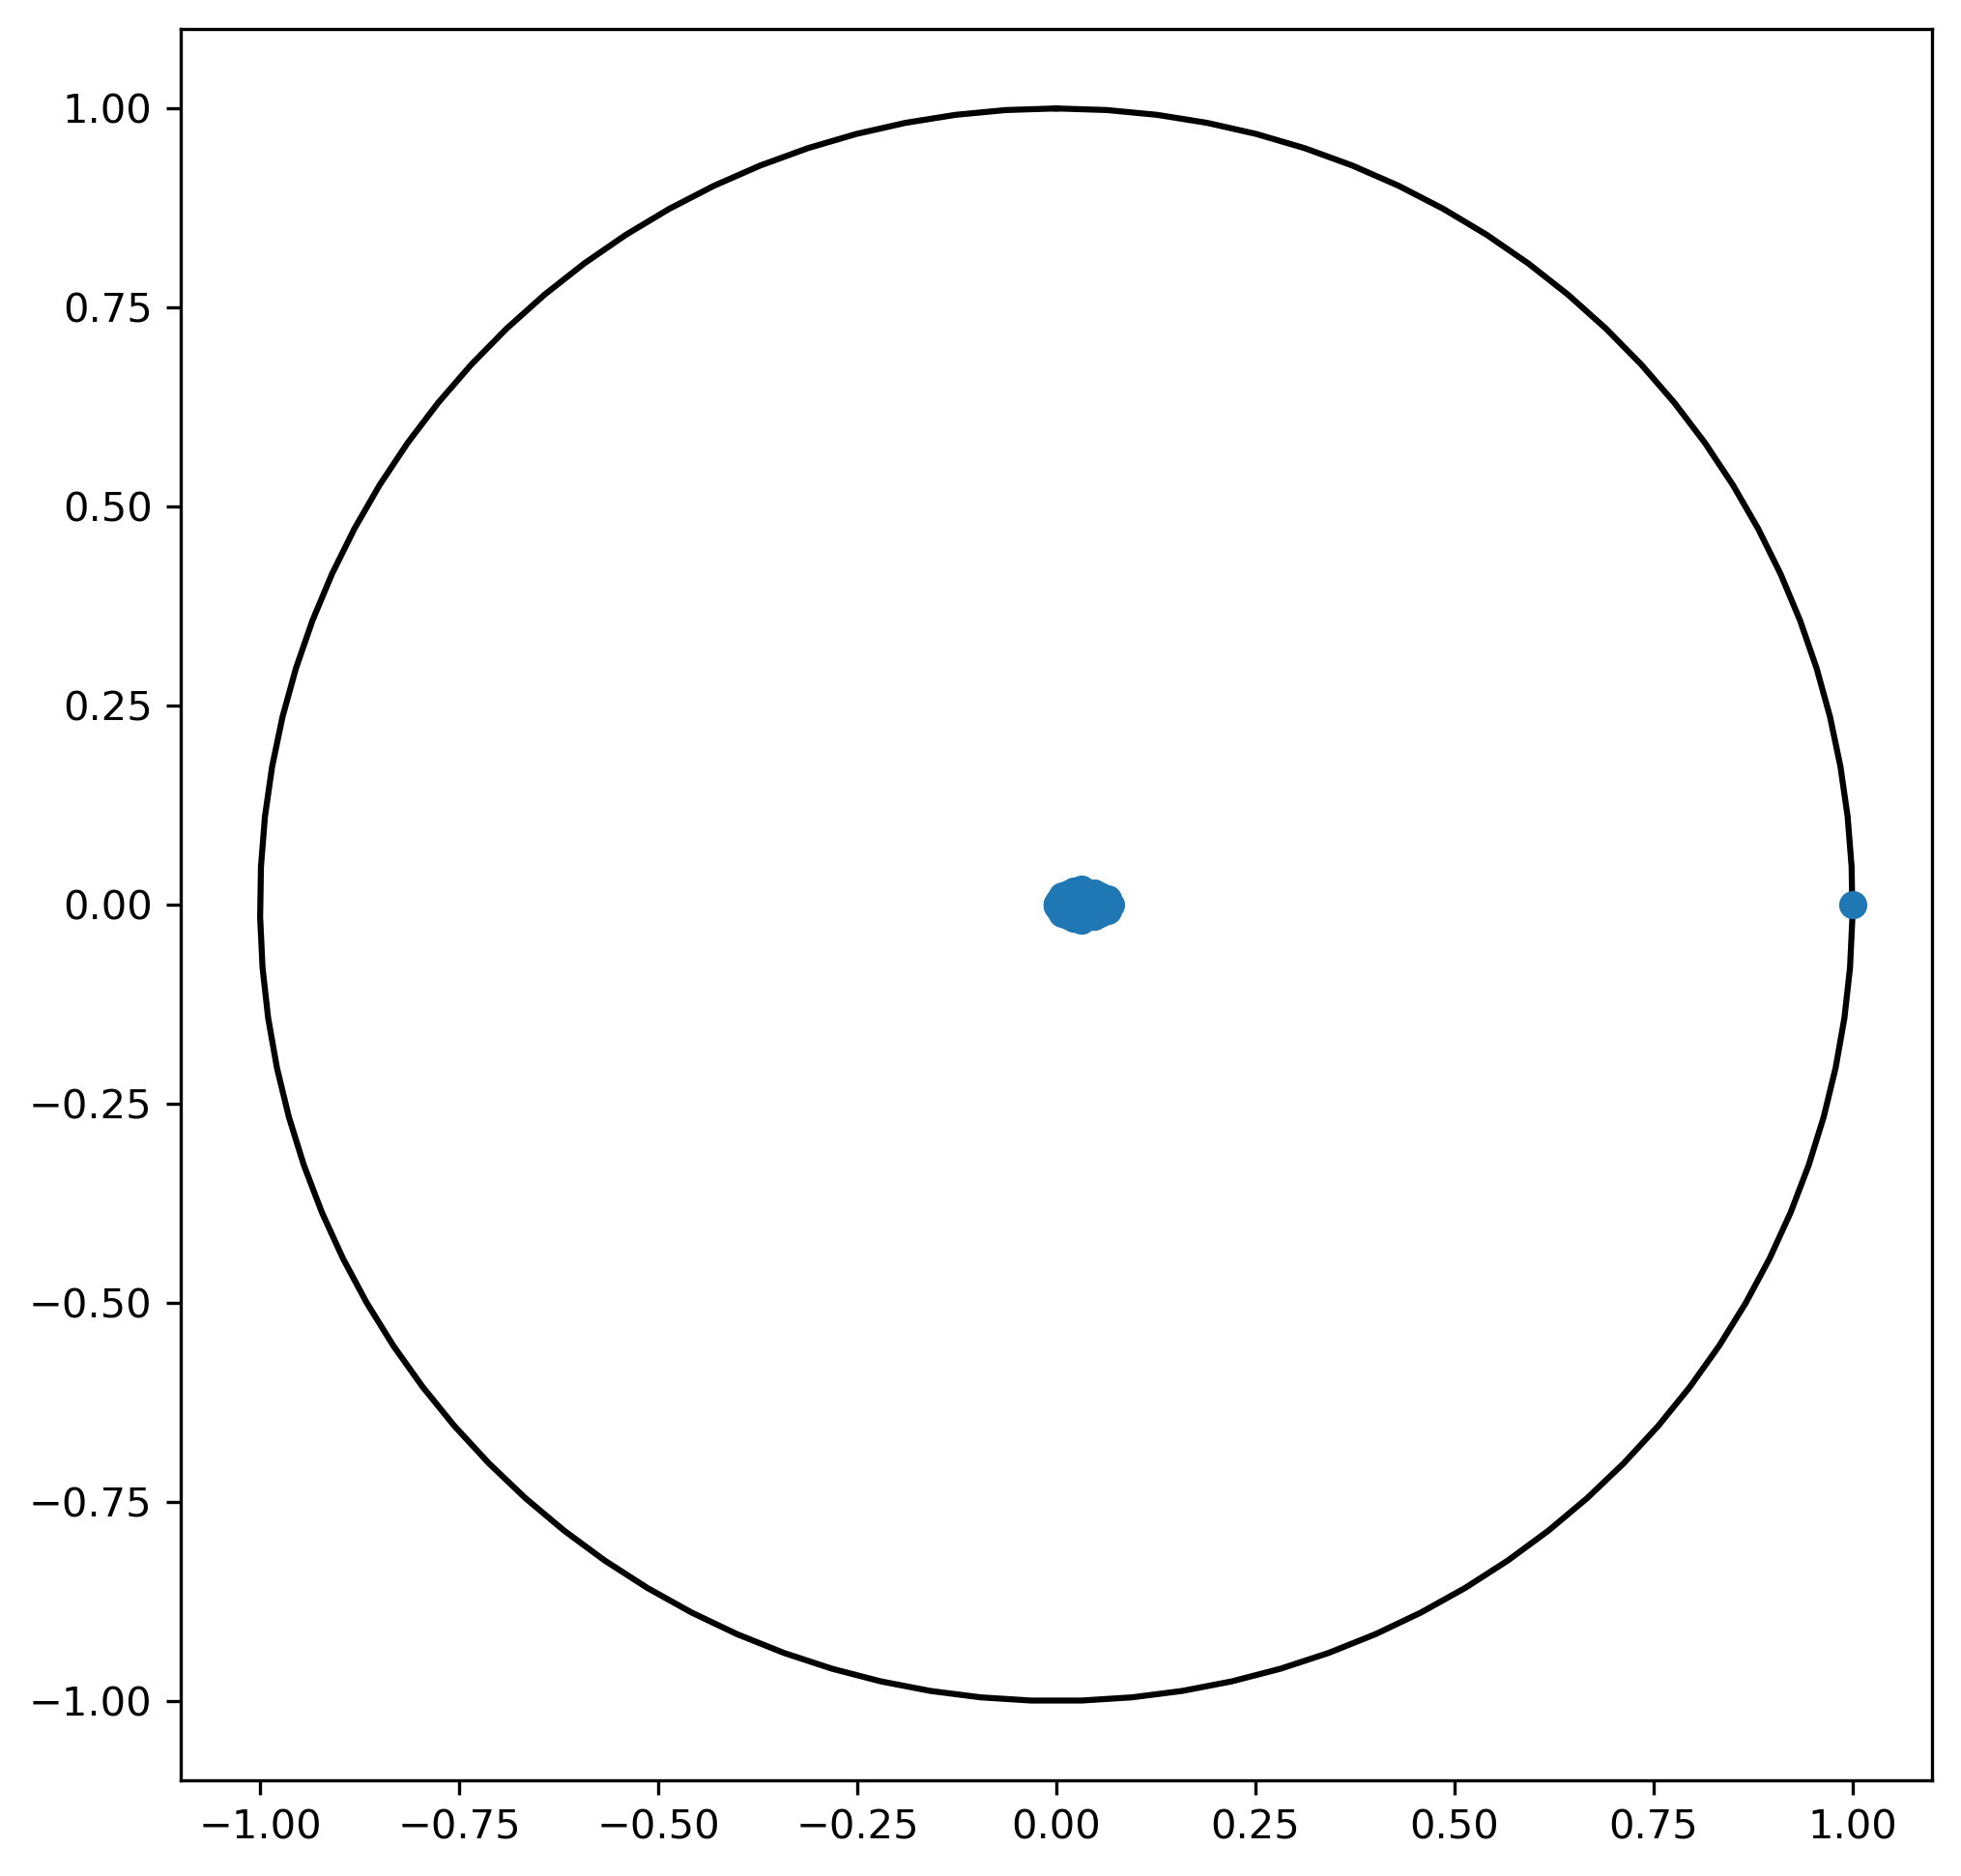

In [17]:
spectrum = channel_spectrum(lindblad)

t = np.linspace(0, 2*np.pi, 100)
circle = [np.sin(t), np.cos(t)]

fig =plt.figure(figsize=(8,8), dpi = 300, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111)
ax.set_aspect(1)
plt.plot(*circle, "k")

plt.plot(spectrum[:,0], spectrum[:,1], "o")

plt.show()

In [18]:
model = ModelQuantumMap(
                        channel = lindblad,
                        loss_function = Conj3(index = 1, sign = 1),
                        optimizer = tf.optimizers.Adam(learning_rate=0.005),
                        )

In [19]:
model.train(inputs = [],
            targets = [],
            num_iter = 100,
            N = 0,
            )

  0%|          | 0/100 [00:00<?, ?it/s]

Step:0, train: 1.3994062939510418e-46
Step:1, train: 1.3994062939510418e-46
Step:2, train: 1.3994062939510418e-46
Step:3, train: 1.3994062939510418e-46
Step:4, train: 1.3994062939510418e-46
Step:5, train: 1.3994062939510418e-46


KeyboardInterrupt: 

In [6]:
model.set_loss_function([Conj3(index = 1, sign = 1)])

In [10]:
model.train(inputs = [],
            targets = [],
            num_iter = 1000,
            N = 0,
            )

  0%|          | 0/1000 [00:00<?, ?it/s]

Step:0, train: 2.3196076960467173e-15
Step:1, train: 2.3196076960467173e-15
Step:2, train: 2.3196076960467173e-15
Step:3, train: 2.3196076960467173e-15
Step:4, train: 2.3196076960467173e-15
Step:5, train: 2.3196076960467173e-15
Step:6, train: 2.3196076960467173e-15
Step:7, train: 2.3196076960467173e-15
Step:8, train: 2.3196076960467173e-15
Step:9, train: 2.3196076960467173e-15
Step:10, train: 2.3196076960467173e-15
Step:11, train: 2.3196076960467173e-15
Step:12, train: 2.3196076960467173e-15
Step:13, train: 2.3196076960467173e-15
Step:14, train: 2.3196076960467173e-15
Step:15, train: 2.3196076960467173e-15
Step:16, train: 2.3196076960467173e-15
Step:17, train: 2.3196076960467173e-15
Step:18, train: 2.3196076960467173e-15
Step:19, train: 2.3196076960467173e-15
Step:20, train: 2.3196076960467173e-15
Step:21, train: 2.3196076960467173e-15
Step:22, train: 2.3196076960467173e-15
Step:23, train: 2.3196076960467173e-15
Step:24, train: 2.3196076960467173e-15
Step:25, train: 2.3196076960467173e

Step:210, train: 2.3195661927205046e-15
Step:211, train: 2.3195610048565022e-15
Step:212, train: 2.319555817004955e-15
Step:213, train: 2.3195506291634815e-15
Step:214, train: 2.3195454413354453e-15
Step:215, train: 2.319540253517479e-15
Step:216, train: 2.3195350657125445e-15
Step:217, train: 2.319529877918442e-15
Step:218, train: 2.3195246901358247e-15
Step:219, train: 2.3195195023649852e-15
Step:220, train: 2.3195143146062994e-15
Step:221, train: 2.3195091268585183e-15
Step:222, train: 2.3195039391219682e-15
Step:223, train: 2.3194987513988426e-15
Step:224, train: 2.319493563685309e-15
Step:225, train: 2.3194883759842673e-15
Step:226, train: 2.3194831882944817e-15
Step:227, train: 2.319478000616827e-15
Step:228, train: 2.319472812950051e-15
Step:229, train: 2.3194676252949695e-15
Step:230, train: 2.319462437651648e-15
Step:231, train: 2.319457250021041e-15
Step:232, train: 2.3194520624000954e-15
Step:233, train: 2.3194468747906557e-15
Step:234, train: 2.319441687195763e-15
Step:235,

Step:421, train: 2.3184717535865416e-15
Step:422, train: 2.3184665671905746e-15
Step:423, train: 2.3184613808046073e-15
Step:424, train: 2.3184561944298533e-15
Step:425, train: 2.318451008066808e-15
Step:426, train: 2.3184458217162304e-15
Step:427, train: 2.318440635376437e-15
Step:428, train: 2.3184354490492474e-15
Step:429, train: 2.3184302627332212e-15
Step:430, train: 2.3184250764280715e-15
Step:431, train: 2.3184198901358067e-15
Step:432, train: 2.318414703853888e-15
Step:433, train: 2.31840951758379e-15
Step:434, train: 2.3184043313260117e-15
Step:435, train: 2.3183991450785005e-15
Step:436, train: 2.3183939588441396e-15
Step:437, train: 2.3183887726200974e-15
Step:438, train: 2.318383586410264e-15
Step:439, train: 2.318378400208936e-15
Step:440, train: 2.3183732140212347e-15
Step:441, train: 2.3183680278432494e-15
Step:442, train: 2.3183628416791188e-15
Step:443, train: 2.318357655524531e-15
Step:444, train: 2.3183524693829367e-15
Step:445, train: 2.318347283252215e-15
Step:446,

KeyboardInterrupt: 

## Fitting General Lindbladian to General Kraus

In [11]:
n = 2
d = 2**n
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

channel_target = KrausMap(d=d, rank=d**2, trainable=False)
channel_model = LindbladMap(d=d, rank=d**2)

In [12]:
model = ModelQuantumMap(
                        channel =channel_model,
                        loss_function = channel_mse_loss,
                        optimizer = tf.optimizers.Adam(learning_rate=0.01),
                           )

In [13]:
model.train(inputs = [],
            targets = [channel_target],
            num_iter = 1000,
            N = 0,
            )

  0%|          | 0/1000 [00:00<?, ?it/s]

Step:0, train: 1.0126534226086128
Step:1, train: 0.9844042464589062
Step:2, train: 0.9588133817304019
Step:3, train: 0.9365532489062811
Step:4, train: 0.9180033382391217
Step:5, train: 0.90277409335958
Step:6, train: 0.8900186243815834
Step:7, train: 0.8789752419070118
Step:8, train: 0.8691530209672034
Step:9, train: 0.8602809569577109
Step:10, train: 0.8522146784377708
Step:11, train: 0.8448695050345141
Step:12, train: 0.8381809128667785
Step:13, train: 0.8320844461060957
Step:14, train: 0.8265096245907764
Step:15, train: 0.8213839255317674
Step:16, train: 0.8166423176452874
Step:17, train: 0.8122365504099218
Step:18, train: 0.8081394332242903
Step:19, train: 0.8043428190811499
Step:20, train: 0.8008507878868987
Step:21, train: 0.7976704726219104
Step:22, train: 0.7948027590282815
Step:23, train: 0.7922350390046051
Step:24, train: 0.789937767315096
Step:25, train: 0.7878658755240193
Step:26, train: 0.7859649315732367
Step:27, train: 0.7841801715457983
Step:28, train: 0.782465407255167

Step:231, train: 0.417572169859164
Step:232, train: 0.4171926443033998
Step:233, train: 0.41683206999587014
Step:234, train: 0.41667042418907885
Step:235, train: 0.4164073538503671
Step:236, train: 0.41605780802510095
Step:237, train: 0.41568790970945146
Step:238, train: 0.41556986716845545
Step:239, train: 0.41537094319927537
Step:240, train: 0.4150562339818574
Step:241, train: 0.41470847361814134
Step:242, train: 0.4142607984178385
Step:243, train: 0.4141188036578436
Step:244, train: 0.41386354017184834
Step:245, train: 0.41357627124952984
Step:246, train: 0.41340121151853043
Step:247, train: 0.4130580637108946
Step:248, train: 0.4128228331626406
Step:249, train: 0.41269286860344123
Step:250, train: 0.4124365776576283
Step:251, train: 0.4120936997717535
Step:252, train: 0.41180770911029896
Step:253, train: 0.41159483359333826
Step:254, train: 0.4114262385482001
Step:255, train: 0.4111684789169252
Step:256, train: 0.4109251155925787
Step:257, train: 0.41062226542771924
Step:258, train

Step:457, train: 0.39461381424215447
Step:458, train: 0.39473861477707506
Step:459, train: 0.3948012991206069
Step:460, train: 0.394710820750188
Step:461, train: 0.39461342810529815
Step:462, train: 0.3945263089190326
Step:463, train: 0.3945723790461285
Step:464, train: 0.3946127170897149
Step:465, train: 0.39458253262047954
Step:466, train: 0.3945712825606912
Step:467, train: 0.3944921986190223
Step:468, train: 0.3944480645206556
Step:469, train: 0.3944100112300686
Step:470, train: 0.3944273552880259
Step:471, train: 0.3943829513075061
Step:472, train: 0.39426850637733135
Step:473, train: 0.39430276605613956
Step:474, train: 0.39442702422303
Step:475, train: 0.394413108207893
Step:476, train: 0.39426991778551956
Step:477, train: 0.39419872228771363
Step:478, train: 0.3942643896693795
Step:479, train: 0.39432279751662336
Step:480, train: 0.3942339841313925
Step:481, train: 0.3941367617817344
Step:482, train: 0.3941365541279984
Step:483, train: 0.3941990708911828
Step:484, train: 0.3941

Step:683, train: 0.39296206709025244
Step:684, train: 0.3929710809613569
Step:685, train: 0.39288824462720684
Step:686, train: 0.3928645720422961
Step:687, train: 0.39278816580126896
Step:688, train: 0.3928196648080733
Step:689, train: 0.3928379712563629
Step:690, train: 0.3928483308318473
Step:691, train: 0.39289288663286603
Step:692, train: 0.3928325849653418
Step:693, train: 0.3928173903658397
Step:694, train: 0.39285633346134774
Step:695, train: 0.3929490685153546
Step:696, train: 0.392898854445832
Step:697, train: 0.3927675989815894
Step:698, train: 0.39276677721944087
Step:699, train: 0.3928308901875917
Step:700, train: 0.39287117324288223
Step:701, train: 0.3927681460900415
Step:702, train: 0.3927657983711341
Step:703, train: 0.39288740372431497
Step:704, train: 0.39290636976296545
Step:705, train: 0.39280047449395317
Step:706, train: 0.39276450395803364
Step:707, train: 0.39279354842969383
Step:708, train: 0.3927901691924817
Step:709, train: 0.3928182585783274
Step:710, train: 

Step:909, train: 0.39225599680932965
Step:910, train: 0.39229525760422773
Step:911, train: 0.39232065632291147
Step:912, train: 0.3922501162987817
Step:913, train: 0.3922204557792027
Step:914, train: 0.39232264146877893
Step:915, train: 0.39240277256809164
Step:916, train: 0.39235179400063047
Step:917, train: 0.3922509008518579
Step:918, train: 0.3923450233306588
Step:919, train: 0.39252526973059804
Step:920, train: 0.3925569005482225
Step:921, train: 0.3924960276162399
Step:922, train: 0.3923920017303967
Step:923, train: 0.39246109112836397
Step:924, train: 0.3924410474804729
Step:925, train: 0.3923172520731035
Step:926, train: 0.39230498062473673
Step:927, train: 0.3923183758641007
Step:928, train: 0.3923098193197806
Step:929, train: 0.3922833034807733
Step:930, train: 0.3923248939572738
Step:931, train: 0.39235882700063646
Step:932, train: 0.3922824941102854
Step:933, train: 0.3922543496703558
Step:934, train: 0.3922759431248518
Step:935, train: 0.392299546183562
Step:936, train: 0.

## Reverse

In [14]:
n = 2
d = 2**n
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

channel_model = KrausMap(d=d, rank=d**2)
channel_target = LindbladMap(d=d, rank=d**2, trainable=False)

In [15]:
model = ModelQuantumMap(
                        channel =channel_model,
                        loss_function = channel_mse_loss,
                        optimizer = tf.optimizers.Adam(learning_rate=0.01),
                           )

In [16]:
model.train(inputs = [],
            targets = [channel_target],
            num_iter = 1000,
            N = 0,
            )

  0%|          | 0/1000 [00:00<?, ?it/s]

Step:0, train: 1.0126534226086128
Step:1, train: 0.9819963671213354
Step:2, train: 0.9520102070109544
Step:3, train: 0.92272207295173
Step:4, train: 0.8941527819258797
Step:5, train: 0.866316148628545
Step:6, train: 0.8392209939226806
Step:7, train: 0.8128716780526031
Step:8, train: 0.7872670600249952
Step:9, train: 0.7624012510066807
Step:10, train: 0.7382643793364578
Step:11, train: 0.7148434984812297
Step:12, train: 0.6921231578250121
Step:13, train: 0.6700859271661228
Step:14, train: 0.6487131805974511
Step:15, train: 0.6279855688895871
Step:16, train: 0.6078835056690476
Step:17, train: 0.5883873540482158
Step:18, train: 0.5694776443638936
Step:19, train: 0.5511353233282077
Step:20, train: 0.5333420528943017
Step:21, train: 0.5160805753104061
Step:22, train: 0.4993349812268111
Step:23, train: 0.4830907456995725
Step:24, train: 0.46733476570889537
Step:25, train: 0.45205516229146575
Step:26, train: 0.4372411656251476
Step:27, train: 0.422882871328604
Step:28, train: 0.40897101355347

Step:226, train: 1.462349123755075e-05
Step:227, train: 1.323141128532786e-05
Step:228, train: 1.1961521418645438e-05
Step:229, train: 1.080374296385784e-05
Step:230, train: 9.748710606479772e-06
Step:231, train: 8.787807076839058e-06
Step:232, train: 7.91319808086676e-06
Step:233, train: 7.1177611715639915e-06
Step:234, train: 6.394992548465753e-06
Step:235, train: 5.73899023235273e-06
Step:236, train: 5.144417619772859e-06
Step:237, train: 4.606350887749771e-06
Step:238, train: 4.120287879954342e-06
Step:239, train: 3.6820590206357447e-06
Step:240, train: 3.2878078875088114e-06
Step:241, train: 2.9338956819850945e-06
Step:242, train: 2.616917961078015e-06
Step:243, train: 2.3336218625994112e-06
Step:244, train: 2.0809736919932702e-06
Step:245, train: 1.856096068414186e-06
Step:246, train: 1.6562649856615876e-06
Step:247, train: 1.478924112885573e-06
Step:248, train: 1.3217028737981525e-06
Step:249, train: 1.1823871209229677e-06
Step:250, train: 1.0589503316251479e-06
Step:251, train:

Step:435, train: 4.404449061329921e-14
Step:436, train: 4.370780718577636e-14
Step:437, train: 4.330198417700801e-14
Step:438, train: 4.307822213747963e-14
Step:439, train: 4.2852361987733446e-14
Step:440, train: 4.263998850660799e-14
Step:441, train: 4.228153054315829e-14
Step:442, train: 4.2119132757353453e-14
Step:443, train: 4.1853902524210704e-14
Step:444, train: 4.167607990204376e-14
Step:445, train: 4.1535444206655675e-14
Step:446, train: 4.1430785597016936e-14
Step:447, train: 4.127099983103963e-14
Step:448, train: 4.094362687415259e-14
Step:449, train: 4.07142574341104e-14
Step:450, train: 4.058798719821503e-14
Step:451, train: 4.0498389449077426e-14
Step:452, train: 4.020309742985942e-14
Step:453, train: 4.0085752513088345e-14
Step:454, train: 3.9994026892607735e-14
Step:455, train: 3.988810809613928e-14
Step:456, train: 3.9842575724648884e-14
Step:457, train: 3.9815820688030777e-14
Step:458, train: 3.978867499812325e-14
Step:459, train: 3.976270754059006e-14
Step:460, train:

Step:644, train: 3.4605947683676774e-14
Step:645, train: 3.460180587398605e-14
Step:646, train: 3.460177500757536e-14
Step:647, train: 3.460174559531762e-14
Step:648, train: 3.46017176492458e-14
Step:649, train: 3.4601691084048135e-14
Step:650, train: 3.458588683155459e-14
Step:651, train: 3.458355697273842e-14
Step:652, train: 3.443804304715714e-14
Step:653, train: 3.439863599015339e-14
Step:654, train: 3.437208136865816e-14
Step:655, train: 3.4363647444484975e-14
Step:656, train: 3.435070263628201e-14
Step:657, train: 3.434691382089991e-14
Step:658, train: 3.430316675163644e-14
Step:659, train: 3.4249807011875565e-14
Step:660, train: 3.423800500978417e-14
Step:661, train: 3.423748019273719e-14
Step:662, train: 3.4185260425570136e-14
Step:663, train: 3.41752549388044e-14
Step:664, train: 3.406729656920606e-14
Step:665, train: 3.406076482778783e-14
Step:666, train: 3.405410708851522e-14
Step:667, train: 3.4031359942700125e-14
Step:668, train: 3.4007667439445174e-14
Step:669, train: 3.4

Step:853, train: 2.837928512098548e-14
Step:854, train: 2.836428487076263e-14
Step:855, train: 2.833268472370422e-14
Step:856, train: 2.835286015491174e-14
Step:857, train: 2.8350372029218395e-14
Step:858, train: 2.8320519282155415e-14
Step:859, train: 2.8323289568631748e-14
Step:860, train: 2.8314808501733453e-14
Step:861, train: 2.8314160798756708e-14
Step:862, train: 2.823271306287413e-14
Step:863, train: 2.8237108804233565e-14
Step:864, train: 2.823427997857998e-14
Step:865, train: 2.821198686422611e-14
Step:866, train: 2.8219833864279217e-14
Step:867, train: 2.8031918036123178e-14
Step:868, train: 2.79906715547277e-14
Step:869, train: 2.7986895189994624e-14
Step:870, train: 2.7967636263591333e-14
Step:871, train: 2.7757702635571868e-14
Step:872, train: 2.7715322972822433e-14
Step:873, train: 2.7684589685444398e-14
Step:874, train: 2.7675767778668845e-14
Step:875, train: 2.7682177819325187e-14
Step:876, train: 2.7679788886550002e-14
Step:877, train: 2.7622518081242593e-14
Step:878,